In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\vedica\Anaconda3\envs\project\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vedica\Anaconda3\envs\project\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vedica\Anaconda3\envs\project\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vedica\Anaconda3\envs\project\lib\site-packages\tensorf

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 25
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = 0.8

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [4]:
with open("C:/Users/vedica/Downloads/BERT-20200915T170230Z-001/BERT/Datasets/training_set.csv", 'r', encoding="utf-8") as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[1])
    sentence = row[0]
    for word in stopwords:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
    sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

2000
2000
which award received konrad lorenz time?


In [5]:
train_size = int(training_portion * len(labels))

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1600
1600
1600
400
400


In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

6
25
11
25
8
25


In [7]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding = padding_type, maxlen=max_length)

print(len(validation_labels))
print(validation_padded.shape)

400
(400, 25)


In [8]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
Total params: 160,841
Trainable params: 160,841
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs = num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 - 2s - loss: 2.1694 - accuracy: 0.1631 - val_loss: 2.1413 - val_accuracy: 0.1600
Epoch 2/20
1600/1600 - 0s - loss: 2.1102 - accuracy: 0.1631 - val_loss: 2.0768 - val_accuracy: 0.1600
Epoch 3/20
1600/1600 - 0s - loss: 2.0541 - accuracy: 0.1631 - val_loss: 2.0319 - val_accuracy: 0.1600
Epoch 4/20
1600/1600 - 0s - loss: 2.0165 - accuracy: 0.2319 - val_loss: 2.0021 - val_accuracy: 0.1650
Epoch 5/20
1600/1600 - 0s - loss: 1.9803 - accuracy: 0.3013 - val_loss: 1.9732 - val_accuracy: 0.3500
Epoch 6/20
1600/1600 - 0s - loss: 1.9324 - accuracy: 0.4631 - val_loss: 1.9330 - val_accuracy: 0.4175
Epoch 7/20
1600/1600 - 0s - loss: 1.8655 - accuracy: 0.5575 - val_loss: 1.8745 - val_accuracy: 0.4775
Epoch 8/20
1600/1600 - 0s - loss: 1.7663 - accuracy: 0.5987 - val_loss: 1.7885 - val_accuracy: 0.5600
Epoch 9/20
1600/1600 - 0s - loss: 1.6329 - 

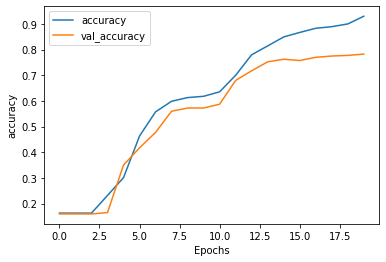

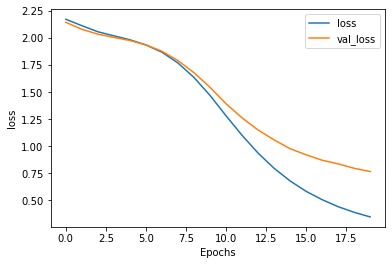

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
model.predict(validation_padded[0:20])

array([[1.47782603e-05, 2.95986850e-02, 1.90238049e-03, 9.03866068e-03,
        8.23173344e-01, 1.19197723e-02, 1.90858648e-03, 3.81520949e-02,
        8.42916146e-02],
       [6.54761971e-05, 1.78221241e-02, 4.39858399e-02, 1.32919014e-01,
        6.57425001e-02, 3.89941096e-01, 1.12982295e-01, 7.41534606e-02,
        1.62388191e-01],
       [8.86890484e-05, 3.88331799e-04, 1.10384161e-02, 1.39599696e-01,
        2.00949726e-03, 3.89914364e-01, 3.76322746e-01, 6.07854426e-02,
        1.98529009e-02],
       [8.72583914e-05, 1.31129876e-01, 4.31235999e-01, 8.18960443e-02,
        1.68962236e-02, 1.49139300e-01, 4.59107868e-02, 6.61057932e-03,
        1.37093946e-01],
       [1.02089522e-04, 3.73922230e-04, 1.09517826e-02, 1.00676768e-01,
        2.99101113e-03, 3.93558681e-01, 3.90941083e-01, 7.83827305e-02,
        2.20220424e-02],
       [2.93175890e-06, 8.89293075e-01, 3.38546708e-02, 4.83630272e-03,
        3.20716091e-02, 1.78426714e-03, 1.49450134e-04, 2.65779585e-04,
        3.7

In [13]:
validation_label_seq[0:10]

array([[4],
       [5],
       [6],
       [2],
       [6],
       [1],
       [4],
       [1],
       [2],
       [3]])

In [14]:
train_labels[0:10]

['4', '0', '6', '2', '7', '2', '5', '4', '2', '7']

In [15]:
score, acc = model.evaluate(validation_padded[0:1], validation_label_seq[0:1])
print('Test score:', score)
print('Test accuracy:', acc)



1/1 [==============================] - 0s 41ms/sample - loss: 0.1946 - accuracy: 1.0000
Test score: 0.19458848237991333
Test accuracy: 1.0


In [20]:
ok=model.predict(validation_padded[0:1])

In [21]:
fine=tf.convert_to_tensor(ok)

In [30]:
final=tf.argmax(fine,1)

In [36]:
tf.get_static_value(final)[0]

4